# Neural Network to classify handwritten digits from mnist dataset

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.activations import relu, sigmoid, linear
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Load Data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [13]:
x_train = x_train / 255.0
x_test = x_test / 255.0


In [14]:
# Define the model
nn_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation=relu),
    Dense(10, activation=sigmoid)
])

In [15]:
# Compile the model
nn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
# Train the model 
history = nn_model.fit(x_train, y_train, epochs=50)

Epoch 1/50


2023-05-31 15:21:37.054220: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 7s 4ms/step - loss: 0.2584 - accuracy: 0.9259
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1140 - accuracy: 0.9656
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0770 - accuracy: 0.9765
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0580 - accuracy: 0.9819
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0442 - accuracy: 0.9864
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0345 - accuracy: 0.9898
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0278 - accuracy: 0.9916
Epoch 8/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0224 - accuracy: 0.9930
Epoch 9/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0181 - accuracy: 0.9942
Epoch 10/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0165 - accurac

In [17]:
# Using the trained model to predict digits in x_test
predictions = nn_model.predict(x_test)

2023-05-31 15:27:37.446001: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 2ms/step


In [18]:
history.history['accuracy'][-1]*100

99.87833499908447

## Plotting the data 

In [19]:
x_train.shape

(60000, 28, 28)

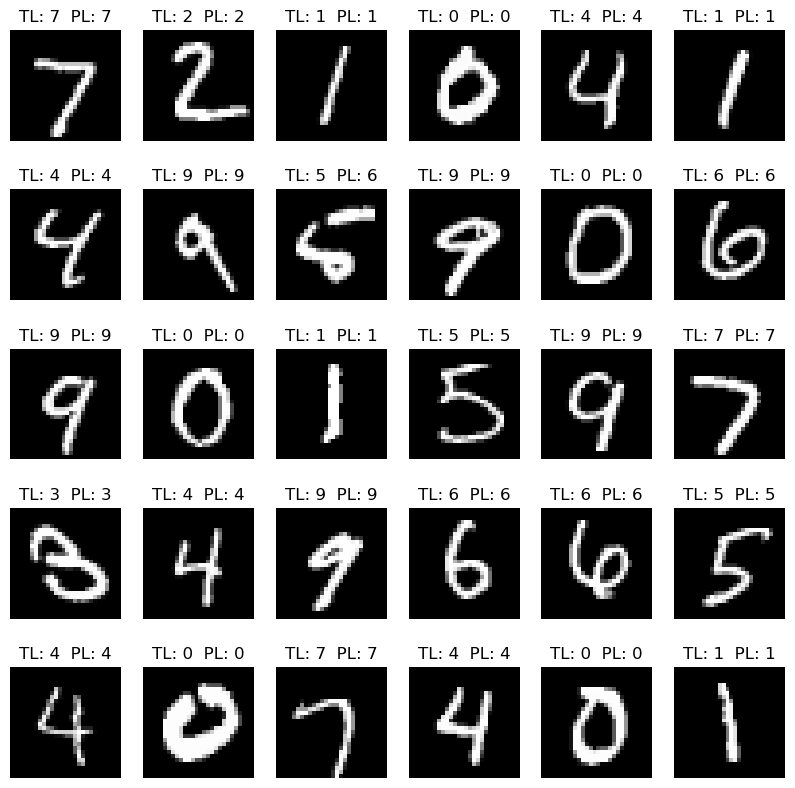

In [20]:
# Predictions made on first 30 samples in x_test

plt.figure(figsize=(10, 10))

samples = 30
for i in range(samples) :
    plt.subplot(5, samples//5, i+1)
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    plt.title(f"TL: {true_label}  PL: {predicted_label}")
    plt.imshow(x_test[i], cmap='gray')
    plt.axis('off')

In [21]:
# Tracking Errors in the first 1000 samples
samples = 1000
error_count = 0
predicted_labels=[]
true_labels=[]
error_indices = []

for i in range(samples) :
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    if predicted_label != true_label :
        error_count+=1
        predicted_labels.append(predicted_label)
        true_labels.append(true_label)
        error_indices.append(i)

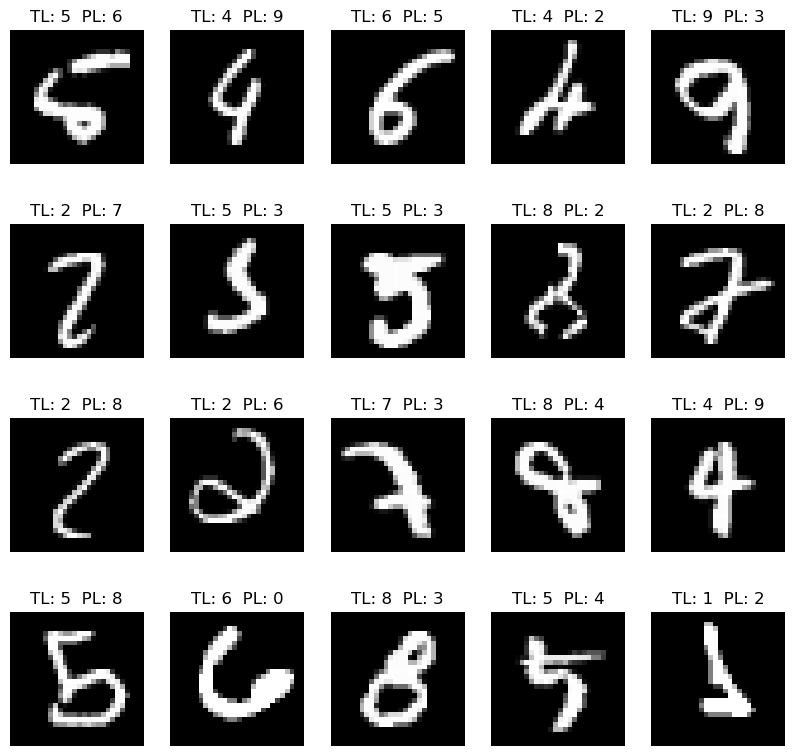

In [22]:
# Plotting errors

plt.figure(figsize=(10, 50))

for i in range(error_count) :
    plt.subplot((error_count//5)*5, 5, i+1)
    plt.title(f"TL: {true_labels[i]}  PL: {predicted_labels[i]}")
    plt.imshow(x_test[error_indices[i]], cmap='gray')
    plt.axis('off')